# AIT Development notebook


## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
| 1|flags set|1|setting of launch jupyter or ait flag.|no edit|
| 2|ait-sdk install|1|Use only jupyter launch.<br>find ait-sdk and install.|no edit|
| 3|create requirements and pip install|3|Use only jupyter launch.<br>create requirements.txt.<br>And install by requirements.txt.|should edit(second cell, you set use modules.)|
| 4|import|2|you should write use import modules.<br>but bottom lines do not edit.|should edit(first cell, you import your moduel.)|
| 5|create manifest|1|Use only jupyter launch.<br>create ait.manifest.json.|should edit|
| 6|create input|1|Use only jupyter launch.<br>create ait.input.json.|should edit|
| 7|initialize|1|this cell is initialize for ait progress.|no edit|
| 8|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
| 9|main|1|Read the data set or model and calls the function defined in `functions-area`.|should edit|
|10|entrypoint|1|Call the main function.|no edit|
|11|license attribute set|1|Use only notebook launch.<br>Setting attribute for license.|should edit|
|12|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and create dag.py.|no edit|

## notebook template revision history

### 1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

### 1.0.0 2020/10/12

* new cerarion

In [ ]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:ait-sdk install
# do not edit
#########################################
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re

    def numericalSort(value):
        numbers = re.compile(r'(\d+)')
        parts = numbers.split(value)
        parts[1::2] = map(int, parts[1::2])
        return parts
    latest_sdk_file_path=sorted(glob('../lib/*.whl'), key=numericalSort)[-1]

    ait_sdk_name = Path(latest_sdk_file_path).name
    
    # copy to develop dir
    import shutil
    current_dir = %pwd
    shutil.copyfile(f'../lib/{ait_sdk_name}', f'{current_dir}/{ait_sdk_name}')

    # install ait-sdk
    !pip install --upgrade pip
    !pip install --force-reinstall ./$ait_sdk_name

     |████████████████████████████████| 1.5 MB 4.6 MB/s eta 0:00:01     |████████████████▌               | 798 kB 4.6 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
Processing ./ait_sdk-0.1.7-py3-none-any.whl
     |████████████████████████████████| 95 kB 2.2 MB/s eta 0:00:011
     |████████████████████████████████| 465 kB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 172 kB 20.1 MB/s eta 0:00:01
     |████████████████████████████████| 14.9 MB 10.9 MB/s eta 0:00:01    |████▎                           | 2.0 MB 11.6 MB/s eta 0:00:02     |█████████▍                      | 4.4 MB 11.6 MB/s eta 0:00:01     |███████████                     | 5.1 MB 11.6 MB/s eta 0:00:01     |███████████▋                    | 5.4 MB 11.6 MB/s eta 0:00:01     |███████████████▉                | 7.4 MB 11.6 MB/s eta 0:00:01     |█████████████████████████████▊  | 13.8 MB 10.9 MB/s eta 0:0

In [3]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

In [4]:
#########################################
# area:create requirements and pip install
# should edit
#########################################
#########################################
# area:create requirements and pip install
# should edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package('pandas', '1.1.1')
    requirements_generator.add_package('seaborn', '0.10.1')
    requirements_generator.add_package('tensorflow', '2.5.0')
    requirements_generator.add_package('aif360', '0.3.0')

In [5]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -r $requirements_path 

Processing ./ait_sdk-0.1.7-py3-none-any.whl
     |████████████████████████████████| 10.5 MB 9.4 MB/s eta 0:00:01    |█▋                              | 522 kB 5.0 MB/s eta 0:00:02     |███▎                            | 1.1 MB 5.0 MB/s eta 0:00:02     |█████████▏                      | 3.0 MB 5.0 MB/s eta 0:00:02     |█████████████████████▎          | 7.0 MB 5.0 MB/s eta 0:00:01     |███████████████████████████▉    | 9.1 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 454.3 MB 29 kB/s  eta 0:00:011   |▌                               | 7.9 MB 10.7 MB/s eta 0:00:42     |▊                               | 10.1 MB 10.7 MB/s eta 0:00:42     |▊                               | 10.6 MB 13.4 MB/s eta 0:00:34     |▉                               | 11.7 MB 13.4 MB/s eta 0:00:34     |█                               | 14.9 MB 13.4 MB/s eta 0:00:33     |█▎                              | 17.6 MB 13.4 MB/s eta 0:00:33   

In [6]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pathlib import Path
from os import makedirs, path
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric

In [7]:
#########################################
# area:import
# do not edit
#########################################

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [8]:
#########################################
# area:create manifest
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('eval_mean_difference_german_aif360')
    manifest_genenerator.set_ait_description('''
                                             detecting bias on credit decisions, data set is german_credit.
                                             Available protected_attribute and privileged_classes example (See german.doc for details)
                                             month(>=24.0),
                                             credit_amount(>=3000.0),
                                             investment_as_income_percentage(>=3.0),
                                             residence_since(>=3.0),
                                             age(>=25.0, defult),
                                             number_of_credits(>=2.0),
                                             people_liable_for(>=2.0)
                                             ''')
    manifest_genenerator.set_ait_author('AIST')
    manifest_genenerator.set_ait_email('')
    manifest_genenerator.set_ait_version('0.1')
    manifest_genenerator.set_ait_quality('https://airc.aist.go.jp/aiqm/quality/internal/Distribution_of_training_data')
    manifest_genenerator.set_ait_reference('')
    manifest_genenerator.add_ait_inventories(name='Data', 
                                             type_='dataset', 
                                             description='german credit data', 
                                             format_=['csv'], 
                                             schema='https://archive.ics.uci.edu/ml/datasets/')
    manifest_genenerator.add_ait_parameters(name='protected_attribute', 
                                            type_='str', 
                                            description='protected attributee', 
                                            default_val='age')
    manifest_genenerator.add_ait_parameters(name='privileged_classes', 
                                            type_='float', 
                                            description='privileged classes', 
                                            default_val='25.0',
                                            min_value='0')
    manifest_genenerator.add_ait_measures(name='mean_difference', 
                                          type_='float', 
                                          description='mean difference of metric fairness', 
                                          structure='single', 
                                          min='-1',
                                          max='1')
    manifest_genenerator.add_ait_resources(name='metric_fairness_plot', 
                                           type_='picture', 
                                           description='base rates polt of privileged_groups and unprivileged_groups')
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AITLog')
    manifest_path = manifest_genenerator.write()

In [9]:
#########################################
# area:create input
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='Data',
                                        value='german_credit/german.csv')
    input_generator.set_ait_params(name='protected_attribute',
                                   value='age')
    input_generator.set_ait_params(name='privileged_classes',
                                   value='25.0')
    input_generator.write()

In [10]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [11]:
#########################################
# area:functions
# should edit
#########################################

def data_loading(filepath, column_names, na_values):
    # load data
    try:
        df = pd.read_csv(filepath, sep=',', header=None, names=column_names, na_values=na_values)
    except IOError as err:
        print("IOError: {}".format(err))
        sys.exit(1)
    return df


In [12]:
#########################################
# area:functions
# should edit
#########################################

def preprocessing(df):
    # ignores the value of privileged_classes for 'sex'
    status_map = {'A91': 'male', 'A93': 'male', 'A94': 'male', 'A92': 'female', 'A95': 'female'}
    df['sex'] = df['personal_status'].replace(status_map)
    return df

In [13]:
#########################################
# area:functions
# should edit
#########################################

def ait_input_check(protected_attribute, privileged_classes):
    # check protected_attribute for available protected attributee example, privileged_classes for numerical
    available_protected_attributee = {'month', 'credit_amount', 'investment_as_income_percentage', 
                                      'residence_since', 'age', 'number_of_credits', 'people_liable_for'}
    if protected_attribute not in available_protected_attributee:
        print("The input protected_attribute is not supported!")
        sys.exit(1)
    if isinstance(privileged_classes, int) and isinstance(privileged_classes, float):
        print("The input privileged_classes must be numerical!")
        sys.exit(1)

In [14]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@measures(ait_output, 'mean_difference')
def measure_mean_difference(mean_difference):
    return mean_difference

In [15]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@resources(ait_output, path_helper, 'metric_fairness_plot', 'metric_fairness_plot.png')
def save_metric_fairness_plot(metric_fairness, protected_attribute, file_path: str=None) -> None:
    
    # base_rates polt of privileged_groups and unprivileged_groups
    base_rates = [[metric_fairness.base_rate(privileged=False)], [metric_fairness.base_rate(privileged=True)]]
    base_rates_df = pd.DataFrame(base_rates,columns=['base_rate'], index=['unprivileged_groups', 'privileged_groups'])
    base_rates_df.round(3)
    base_rate = metric_fairness.base_rate(privileged=None)
    fig, ax1 = plt.subplots(figsize=(10, 7))
    sn.set_style("whitegrid")
    sn.barplot(x=base_rates_df.index, y=base_rates_df.base_rate, ax=ax1).\
    set_title(protected_attribute + ' metric fairness of German credit data', fontsize=16, fontweight='bold')
    ax1.axhline(base_rate, color='k', linestyle=':')
    ax1.set(xlabel='', ylabel='')
    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14)
    fig.savefig(file_path)
    
    return file_path

In [16]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> None:
    shutil.move(get_log_path(), file_path)

In [17]:
#########################################
# area:main
# should edit
#########################################

@log(logger)
@ait_main(ait_output, path_helper)
def main() -> None:

    # read from inventor
    filepath = ait_input.get_inventory_path('Data')
    
    # prepare column names as given by german.doc
    column_names = ['status', 'month', 'credit_history', 'purpose', 'credit_amount', 'savings', 'employment', 
                    'investment_as_income_percentage', 'personal_status', 'other_debtors', 'residence_since', 
                    'property', 'age', 'installment_plans', 'housing', 'number_of_credits', 'skill_level', 
                    'people_liable_for', 'telephone', 'foreign_worker', 'credit']
    
    # load into a dataframe
    df = data_loading(filepath=filepath, column_names=column_names, na_values=None)
    
    # prepare for mappings
    mappings = {'label_maps': [{1.0: 'Good Credit', 2.0: 'Bad Credit'}], 
                'protected_attribute_maps': [{1.0: 'Male', 0.0: 'Female'}, {1.0: 'Old', 0.0: 'Young'}]}
    
    # prepare for categorical features
    categorical_features = ['status', 'credit_history', 'purpose', 'savings', 'employment', 'other_debtors', 
                            'property', 'installment_plans', 'housing', 'skill_level', 'telephone', 'foreign_worker']
    
    # load param
    protected_attribute = ait_input.get_method_param_value('protected_attribute')
    privileged_classes = ait_input.get_method_param_value('privileged_classes')
        
    # input check
    ait_input_check(protected_attribute, privileged_classes)
    
    # prepare for structure from dataframe and edit data features setting
    dataset = StandardDataset(df=df, label_name='credit', favorable_classes=[1], protected_attribute_names=[protected_attribute], 
                              privileged_classes=[lambda x: x >= privileged_classes], instance_weights_name=None, 
                              categorical_features=categorical_features, features_to_keep=None, 
                              features_to_drop=['personal_status', 'sex'], na_values=None,
                              custom_preprocessing=preprocessing, metadata=mappings)
    
    # set two variables for the privileged (1) and unprivileged (0) values for the age attribute.
    privileged_groups = [{protected_attribute: 1}]
    unprivileged_groups = [{protected_attribute: 0}]
    
    # compute fairness metric on original training dataset
    metric_fairness = BinaryLabelDatasetMetric(dataset, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    
    print("Original training dataset: German Credit Data")
    print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_fairness.mean_difference())
    print("unprivileged groups = %f" % metric_fairness.base_rate(privileged=False))
    print("privileged groups = %f" % metric_fairness.base_rate(privileged=True))

    # resource observed_predicted_plot
    save_metric_fairness_plot(metric_fairness, protected_attribute)
    
    # measures
    measure_mean_difference(metric_fairness.mean_difference())
    
    # ait.log
    move_log()

Original training dataset: German Credit Data
Difference in mean outcomes between unprivileged and privileged groups = -0.128550
unprivileged groups = 0.590604
privileged groups = 0.719154


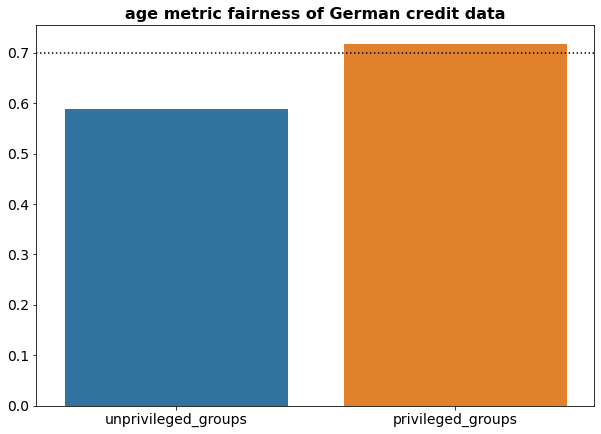

In [18]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [19]:
#########################################
# area:license attribute set
# should edit
#########################################
ait_owner='AIST'
ait_creation_year='2020'

In [20]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_manifest, ait_sdk_name, current_dir, requirements_path, is_remote_deploy=True)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
